# Day 6, Part 1 - Data processing
Let's take a step back and look at some larger planet data to see how we might process a large list of data.  In this example, we'll use more Kepler data.

While filtering is important only sometimes for simulated data, it is generally necessary for observational data & if we want to compare our simulations to observations.

We'll use the "pandas" package to do this which can be a useful thing to know how to use anyway!

In [1]:
# import our usual stuffs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# now, import pandas
import pandas as pd

In [5]:
# now let's read in the kepler confirmed planets dataset
planets = pd.read_csv('https://jnaiman.github.io/csci-p-14110/lesson06/data/planets_2019.07.12_17.16.25.csv', 
                     sep=",", comment="#")
#note: feel free to download this and read from your download as well

In [6]:
planets
# formatting here is sort of nice

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_sperr,st_splim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_age,st_ageerr1,st_ageerr2,st_agelim
0,11 Com,b,11 Com b,Radial Velocity,0,1,326.030000,0.320000,-0.320000,0.0,...,NaN,0.0,2.243,0.071,-0.085,0.0,NaN,NaN,NaN,NaN
1,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.219970,3.200000,-3.200000,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,14 And,b,14 And b,Radial Velocity,0,1,185.840000,0.230000,-0.230000,0.0,...,NaN,0.0,1.763,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,14 Her,b,14 Her b,Radial Velocity,0,1,1773.400020,2.500000,-2.500000,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
4,16 Cyg B,b,16 Cyg B b,Radial Velocity,0,1,798.500000,1.000000,-1.000000,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
5,18 Del,b,18 Del b,Radial Velocity,0,1,993.300000,3.200000,-3.200000,0.0,...,NaN,0.0,1.602,NaN,NaN,0.0,NaN,NaN,NaN,NaN
6,1RXS J160929.1-210524,b,1RXS J160929.1-210524 b,Imaging,0,1,NaN,NaN,NaN,NaN,...,NaN,0.0,-0.370,0.150,-0.150,0.0,0.005,NaN,NaN,NaN
7,24 Boo,b,24 Boo b,Radial Velocity,0,1,30.350600,0.007800,-0.007700,0.0,...,NaN,0.0,1.774,0.047,-0.053,0.0,6.920,4.830,-2.750,0.0
8,24 Sex,b,24 Sex b,Radial Velocity,0,2,452.800000,2.100000,-4.500000,0.0,...,NaN,0.0,1.164,0.003,-0.003,0.0,2.700,0.400,-0.400,NaN
9,24 Sex,c,24 Sex c,Radial Velocity,0,2,883.000000,32.400000,-13.800000,0.0,...,NaN,0.0,1.164,0.003,-0.003,0.0,2.700,0.400,-0.400,NaN


In [7]:
# how many entries are there? as an iterable
planets.index

RangeIndex(start=0, stop=4016, step=1)

In [8]:
planets.loc[0:3] #easy to grab subsets - here by label
#planets.loc? #easy to grab subsets - here by label

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_sperr,st_splim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_age,st_ageerr1,st_ageerr2,st_agelim
0,11 Com,b,11 Com b,Radial Velocity,0,1,326.03000,0.32,-0.32,0.0,...,NaN,0.0,2.243,0.071,-0.085,0.0,NaN,NaN,NaN,NaN
1,11 UMi,b,11 UMi b,Radial Velocity,0,1,516.21997,3.20,-3.20,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2,14 And,b,14 And b,Radial Velocity,0,1,185.84000,0.23,-0.23,0.0,...,NaN,0.0,1.763,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,14 Her,b,14 Her b,Radial Velocity,0,1,1773.40002,2.50,-2.50,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0


In [9]:
planets.columns
# names of columns

Index(['pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod',
       'pl_controvflag', 'pl_pnum', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_orbincl', 'pl_orbinclerr1',
       'pl_orbinclerr2', 'pl_orbincllim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_radj',
       'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_dens', 'pl_denserr1',
       'pl_denserr2', 'pl_denslim', 'ra_str', 'ra', 'dec_str', 'dec',
       'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim', 'gaia_dist',
       'gaia_disterr1', 'gaia_disterr2', 'gaia_distlim', 'st_optmag',
       'st_optmagerr', 'st_optmaglim', 'st_optband', 'gaia_gmag',
       'gaia_gmagerr', 'gaia_gmaglim', 'st_teff', 'st_tefferr1', 'st_tefferr2',
       'st_tefflim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_mass

In [10]:
planets.loc[0:10]["pl_orbeccen"] # grab 1-10 entries, and print out the eccentricites of those entries
# notice there are some NaN's -> these just don't have entries

0     0.231
1     0.080
2     0.000
3     0.370
4     0.680
5     0.080
6       NaN
7     0.042
8     0.090
9     0.290
10      NaN
Name: pl_orbeccen, dtype: float64

In [17]:
# what are the names of the unique host stars?
planets["pl_hostname"].unique() 

array(['11 Com', '11 UMi', '14 And', ..., 'tau Gem', 'ups And', 'xi Aql'],
      dtype=object)

In [11]:
planets["pl_hostname"].nunique() # how many unique host stars?

2994

In [12]:
# if you are used to R at all, this is sort of like "summary" function, but basically giving some 
# summary statistics for the numerical data in our dataset
planets.describe()
# note that while things like the statistics for the orbital period are interesting
# the "mean" of the pl_controvflag which is a flag if this planet is controversal or not
#  is essentially meaningless

,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,...,st_sperr,st_splim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_age,st_ageerr1,st_ageerr2,st_agelim
count,4016.000000,4016.000000,3.907000e+03,3.775000e+03,3.775000e+03,3941.000000,2338.000000,1535.000000,1534.000000,2501.000000,...,0.0,1335.0,584.000000,506.000000,493.000000,1401.0,2004.000000,1865.000000,1865.000000,904.0
mean,0.002739,1.772410,2.326363e+03,1.051761e+03,-1.082432e+03,-0.000507,6.702867,0.424368,-0.429475,-0.000400,...,NaN,0.0,-0.136529,0.067524,-0.075288,0.0,4.161321,2.991969,-1.947577,0.0
std,0.052271,1.159506,1.171632e+05,5.948289e+04,5.968316e+04,0.039020,81.279863,5.715557,5.996049,0.019996,...,NaN,0.0,1.135486,0.090381,0.128068,0.0,2.162373,2.117259,1.087434,0.0
min,0.000000,1.000000,9.070629e-02,0.000000e+00,-3.650000e+06,-1.000000,0.004400,0.000000,-200.000000,-1.000000,...,NaN,0.0,-3.480000,0.000000,-1.431000,0.0,0.001000,0.001000,-8.000000,0.0
25%,0.000000,1.000000,4.516936e+00,1.600000e-05,-1.165000e-03,0.000000,0.057000,0.000800,-0.040000,0.000000,...,NaN,0.0,-0.680000,0.027000,-0.077000,0.0,2.950000,1.140000,-2.710000,0.0
50%,0.000000,1.000000,1.193212e+01,9.500000e-05,-9.600000e-05,0.000000,0.118840,0.003100,-0.003100,0.000000,...,NaN,0.0,-0.024500,0.049000,-0.050000,0.0,4.070000,2.500000,-2.020000,0.0
75%,0.000000,2.000000,4.231980e+01,1.173500e-03,-1.600000e-05,0.000000,0.680000,0.040000,-0.000808,0.000000,...,NaN,0.0,0.479000,0.079000,-0.028000,0.0,4.790000,4.890000,-1.030000,0.0
max,1.000000,8.000000,7.300000e+06,3.650000e+06,0.000000e+00,1.000000,2500.000000,200.000000,0.000000,0.000000,...,NaN,0.0,3.015000,0.845000,0.000000,0.0,23.000000,26.000000,-0.001000,0.0


In [15]:
# we can also search for subsets easily
# we can look for only circular orbits
# -> look for eccentricity == 0
planets.loc[planets["pl_orbeccen"] == 0.0] 

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_sperr,st_splim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_age,st_ageerr1,st_ageerr2,st_agelim
2,14 And,b,14 And b,Radial Velocity,0,1,185.840000,2.300000e-01,-2.300000e-01,0.0,...,NaN,0.0,1.763,NaN,NaN,0.0,NaN,NaN,NaN,NaN
48,BD+20 594,b,BD+20 594 b,Transit,0,1,41.685500,3.000000e-03,-3.000000e-03,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
52,BD-06 1339,b,BD-06 1339 b,Radial Velocity,0,2,3.872800,4.000000e-04,-4.000000e-04,0.0,...,NaN,0.0,-1.022,0.043,-0.048,0.0,4.400,4.000,-4.000,NaN
64,CoRoT-1,b,CoRoT-1 b,Transit,0,1,1.508956,6.400000e-06,-6.400000e-06,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,CoRoT-11,b,CoRoT-11 b,Transit,0,1,2.994330,1.100000e-05,-1.100000e-05,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,2.000,1.000,-1.000,NaN
68,CoRoT-13,b,CoRoT-13 b,Transit,0,1,4.035190,3.000000e-05,-3.000000e-05,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,1.635,1.515,-1.515,NaN
69,CoRoT-14,b,CoRoT-14 b,Transit,0,1,1.512140,1.300000e-04,-1.300000e-04,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,4.200,3.800,-3.800,NaN
71,CoRoT-17,b,CoRoT-17 b,Transit,0,1,3.768100,3.000000e-04,-3.000000e-04,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,10.700,1.000,-1.000,NaN
77,CoRoT-21,b,CoRoT-21 b,Transit,0,1,2.724740,1.400000e-04,-1.400000e-04,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,4.100,0.100,-0.500,0.0
80,CoRoT-24,b,CoRoT-24 b,Transit,0,2,5.113400,6.000000e-04,-6.000000e-04,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,11.000,NaN,NaN,NaN


In [16]:
# or very eccentric orbits
planets.loc[planets["pl_orbeccen"] >= 0.9] 

,pl_hostname,pl_letter,pl_name,pl_discmethod,pl_controvflag,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,...,st_sperr,st_splim,st_lum,st_lumerr1,st_lumerr2,st_lumlim,st_age,st_ageerr1,st_ageerr2,st_agelim
587,HD 20782,b,HD 20782 b,Radial Velocity,0,1,597.0643,0.0256,-0.0256,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
732,HD 4113,b,HD 4113 b,Radial Velocity,0,1,526.6200,0.3000,-0.3000,0.0,...,NaN,0.0,0.086,NaN,NaN,0.0,6.4,1.6,-1.6,NaN
805,HD 7449,b,HD 7449 b,Radial Velocity,0,1,1255.5000,5.1000,-5.1000,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
817,HD 80606,b,HD 80606 b,Radial Velocity,0,1,111.4367,0.0004,-0.0004,0.0,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0


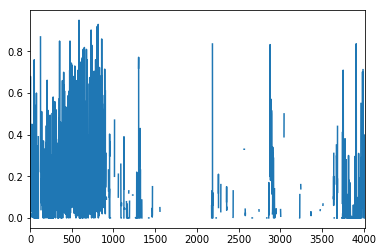

In [18]:
# pandas also provides a matplotlib-like interface
#  to make quick plots to look at our data
planets["pl_orbeccen"].plot() # easy plots with pandas dataframes

So we can see there are a lot of both zero and less very eccentric planets. 

Note also that there are a lot of empty spots - this indicates where there are "NaN"s - or non-entries.

In [19]:
# we can take min & maxes like with numpy arrays:
planets['pl_orbeccen'].min(), planets['pl_orbeccen'].max()

(0.0, 0.95)

There are things like "groupby" and things that we aren't likely to get into right now.